In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('rice-leaf-diseases'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0107.jpg
rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0332.JPG
rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0118.jpg
rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0106.jpg
rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0304.JPG
rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0337.JPG
rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0114.jpg
rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0333.JPG
rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0323.JPG
rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0300.JPG
rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0295.JPG
rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0305.JPG
rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0306.JPG
rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0307.JPG
rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0391.jpg
rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0116.jpg
rice-lea

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2024-02-09 21:18:15.856217: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-09 21:18:16.508015: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-09 21:18:16.511070: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-09 21:18:17.891263: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [36]:
data_dir = 'rice-leaf-diseases/rice_leaf_diseases'

In [37]:
data_dir

'rice-leaf-diseases/rice_leaf_diseases'

In [38]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('rice-leaf-diseases/rice_leaf_diseases')

In [39]:
list(data_dir.glob("*DSC*.jpg"))

[]

In [40]:
bacteria=list(data_dir.glob("Bacterial leaf blight/*"))
len(bacteria)

40

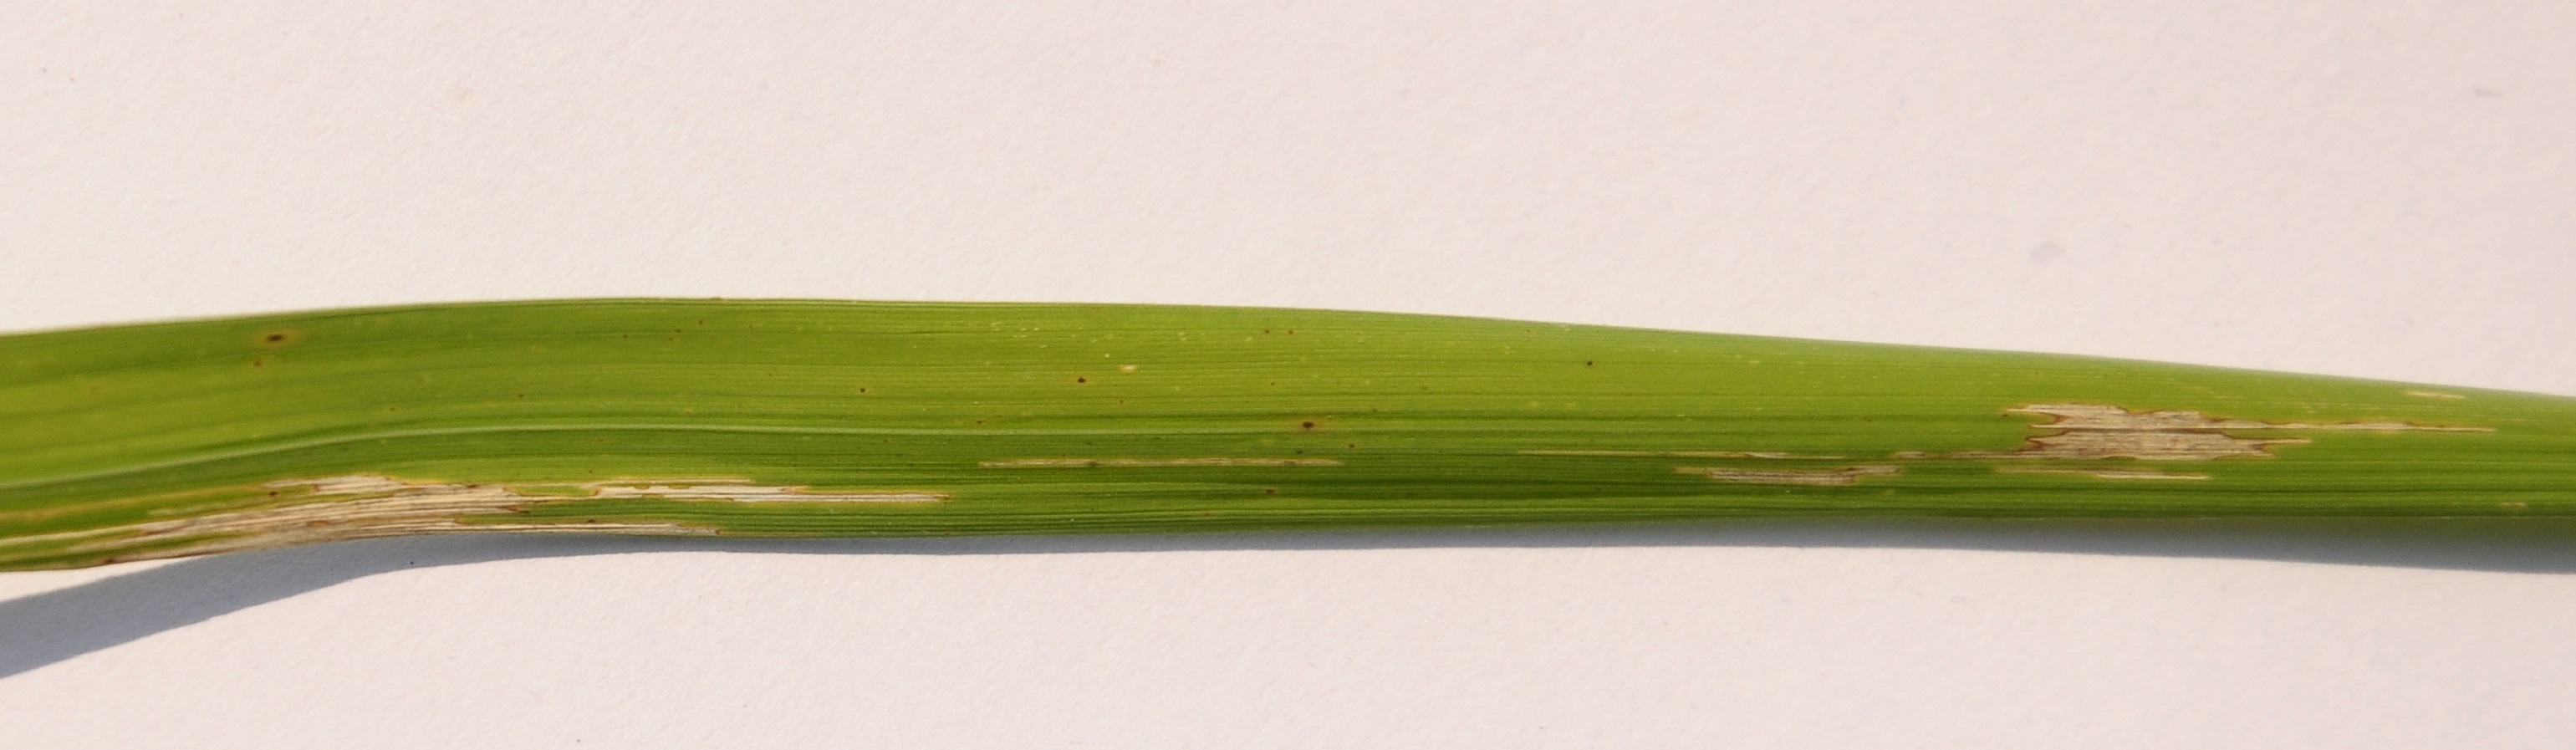

In [41]:
PIL.Image.open(str(bacteria[0]))

In [42]:
brown=list(data_dir.glob("Brown spot/*"))
len(brown)

40

In [43]:
dict={"bacteria":list(data_dir.glob("Bacterial leaf blight/*")),"brown":list(data_dir.glob("Brown spot/*")),"smut":list(data_dir.glob("Leaf smut/*"))}

In [44]:
labels_dict = {
    'bacteria': 0,
    'brown': 1,
    'smut': 2,
}

In [45]:
str(dict["smut"][0])

'rice-leaf-diseases/rice_leaf_diseases/Leaf smut/DSC_0313.JPG'

In [46]:
img=cv2.imread(str((dict["smut"][0])))
               


In [47]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [48]:
X, y = [], []

for name, images in dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(labels_dict[name])

In [49]:
y[:5]

[0, 0, 0, 0, 0]

In [50]:
X = np.array(X)
y = np.array(y)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [52]:
len(X_test)

30

In [53]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [54]:
num_classes = 3
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

2024-02-09 21:19:07.988733: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-09 21:19:07.989890: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/30


2024-02-09 21:19:08.313308: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 34992000 exceeds 10% of free system memory.
2024-02-09 21:19:09.689860: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 66355200 exceeds 10% of free system memory.
2024-02-09 21:19:09.802249: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33177600 exceeds 10% of free system memory.
2024-02-09 21:19:09.873397: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25660800 exceeds 10% of free system memory.
2024-02-09 21:19:09.942281: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33177600 exceeds 10% of free system memory.


3/3 [==============================] - 2s 330ms/step - loss: 2.5457 - accuracy: 0.2444
Epoch 2/30
3/3 [==============================] - 1s 299ms/step - loss: 1.1293 - accuracy: 0.3444
Epoch 3/30
3/3 [==============================] - 1s 310ms/step - loss: 1.0716 - accuracy: 0.4444
Epoch 4/30
3/3 [==============================] - 1s 296ms/step - loss: 1.0377 - accuracy: 0.5667
Epoch 5/30
3/3 [==============================] - 1s 310ms/step - loss: 0.9253 - accuracy: 0.7667
Epoch 6/30
3/3 [==============================] - 1s 327ms/step - loss: 0.7997 - accuracy: 0.7222
Epoch 7/30
3/3 [==============================] - 1s 306ms/step - loss: 0.6508 - accuracy: 0.7556
Epoch 8/30
3/3 [==============================] - 1s 306ms/step - loss: 0.6612 - accuracy: 0.6889
Epoch 9/30
3/3 [==============================] - 1s 293ms/step - loss: 0.5571 - accuracy: 0.7444
Epoch 10/30
3/3 [==============================] - 1s 296ms/step - loss: 0.4442 - accuracy: 0.8333
Epoch 11/30
3/3 [=============

In [56]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 95ms/step - loss: 0.9177 - accuracy: 0.7667


[0.917702853679657, 0.7666666507720947]

In [57]:
predictions = model.predict(X_test_scaled)
predictions

1/1 [==============================] - 0s 212ms/step


array([[-6.4710385e-01,  6.6056175e+00, -3.2161851e+00],
       [-1.4130067e+00, -2.4895813e+00,  1.3303702e+00],
       [-1.2188903e+01,  4.9152555e+00,  7.8441029e+00],
       [ 2.8562622e+00, -3.3226643e+00, -2.1112113e+00],
       [-4.7155986e+00,  9.2705784e+00,  1.0886186e-01],
       [ 5.8657894e+00, -3.0976446e+00, -4.8574543e+00],
       [-1.4161730e+00, -1.6109566e-01,  3.2829466e-01],
       [ 1.8342077e+00, -1.5795249e+00, -2.0816071e+00],
       [-3.6789217e+00, -2.3776685e-01,  2.7642548e+00],
       [-6.8277221e+00,  6.9109421e+00,  2.6926415e+00],
       [ 7.7943521e+00, -2.1577649e+00, -7.7241983e+00],
       [-5.7652140e-01,  1.1724054e+00, -1.0361564e+00],
       [ 2.3748162e+00,  1.3923274e+00, -3.7605665e+00],
       [ 1.7763063e+00,  4.3791518e+00, -4.5504284e+00],
       [-5.0220132e+00,  4.9740286e+00,  2.2982459e+00],
       [-8.4861689e+00,  5.8875656e+00,  4.4211025e+00],
       [ 5.0958037e+00, -4.2307925e+00, -3.6448109e+00],
       [-7.8691258e+00,  5.5162

In [58]:
score = tf.nn.softmax(predictions[0])

In [59]:
np.argmax(score)

1

In [60]:
medicine = [
    "An additional 5 kg of potash fertilizer per bigha should be applied by sprinkling water. Spraying of chelated zinc at the rate of 1 gram per liter of water reduces the severity of the disease.",
    "Carbendazim (Autostin) should be mixed and sprayed at the rate of 1.5 grams per liter of water",
    "Carbendazim group fungicides such as Autostin or Noin at the rate of 1.5 gm/litre or Propiconazole (Tilt 250 EC) at the rate of 1 ml/litre should be sprayed with water.",
]

In [75]:
detected = np.argmax(score)
for key, val in labels_dict.items():
    if detected == val:
        print("Detected disease: " + key)
        print(medicine[val])
    elif detected>=3:
        print("Others")

Detected disease: brown
Carbendazim (Autostin) should be mixed and sprayed at the rate of 1.5 grams per liter of water


In [71]:
y_test[0]

1

In [63]:
data_augmentation = keras.Sequential(
  [

    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomFlip("horizontal")
  ]
)

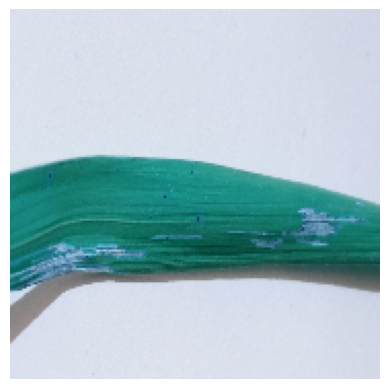

In [64]:
plt.axis('off')
plt.imshow(X[0])


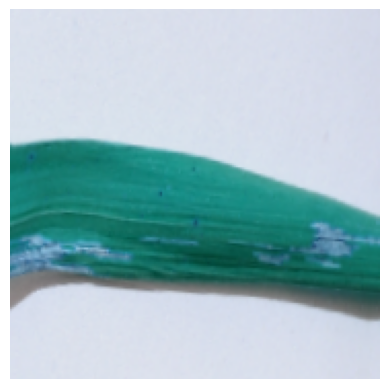

In [65]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [66]:
num_classes = 3

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=40)    

Epoch 1/40
3/3 [==============================] - 3s 345ms/step - loss: 2.0720 - accuracy: 0.3778
Epoch 2/40
3/3 [==============================] - 1s 356ms/step - loss: 1.5925 - accuracy: 0.3667
Epoch 3/40
3/3 [==============================] - 1s 351ms/step - loss: 1.1970 - accuracy: 0.3556
Epoch 4/40
3/3 [==============================] - 1s 368ms/step - loss: 1.0926 - accuracy: 0.3556
Epoch 5/40
3/3 [==============================] - 1s 344ms/step - loss: 1.0945 - accuracy: 0.3444
Epoch 6/40
3/3 [==============================] - 1s 350ms/step - loss: 1.0757 - accuracy: 0.4111
Epoch 7/40
3/3 [==============================] - 1s 362ms/step - loss: 1.0568 - accuracy: 0.5000
Epoch 8/40
3/3 [==============================] - 1s 367ms/step - loss: 1.0719 - accuracy: 0.5111
Epoch 9/40
3/3 [==============================] - 1s 373ms/step - loss: 0.9961 - accuracy: 0.6000
Epoch 10/40
3/3 [==============================] - 1s 347ms/step - loss: 1.0112 - accuracy: 0.5444
Epoch 11/40
3/3 [==

In [67]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 242ms/step - loss: 0.7787 - accuracy: 0.7000


[0.7787200212478638, 0.699999988079071]

Here End of the main model code that downloaded from kaggle

In [68]:
print("Here end of the main model from kaggle")

Here end of the main model from kaggle
